# Project Overview.

- Predicting Sales for Big Mart.
- Trying Machine learning Algorithms
- Building Pipeline using best model

# Project Structure.

- Importing Data
    
    - Importing Libraries 
    - Imputing missing values
    
    
- Exploratory Data Analysis
    - Univariate Analysis.
    
- Data Handling.
    - Data Preprocessing
    - Train Test split
    - Data Scaling
    
- Trying Machine Learning Algorithms 
     - Random Forest
    

- Fitting model

- Saving as pickle file

- Trying on Test Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#handling training data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


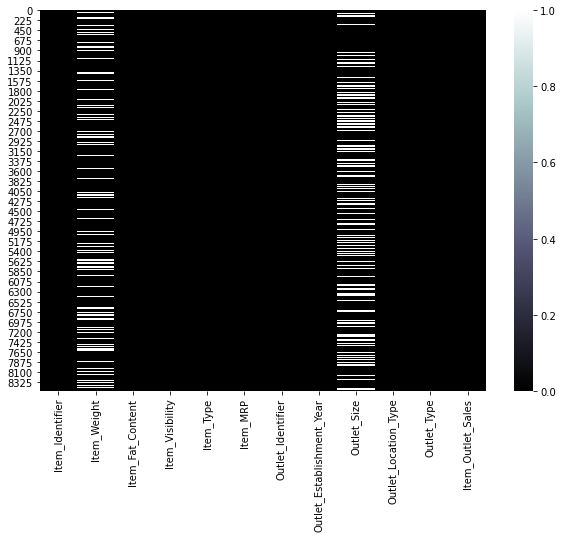

In [4]:
plt.figure(figsize = (10, 7))
sns.heatmap(data = train.isnull(), cmap = 'bone')
plt.show()

In [5]:
#missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#handling missing values
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [7]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Univariate analysis


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

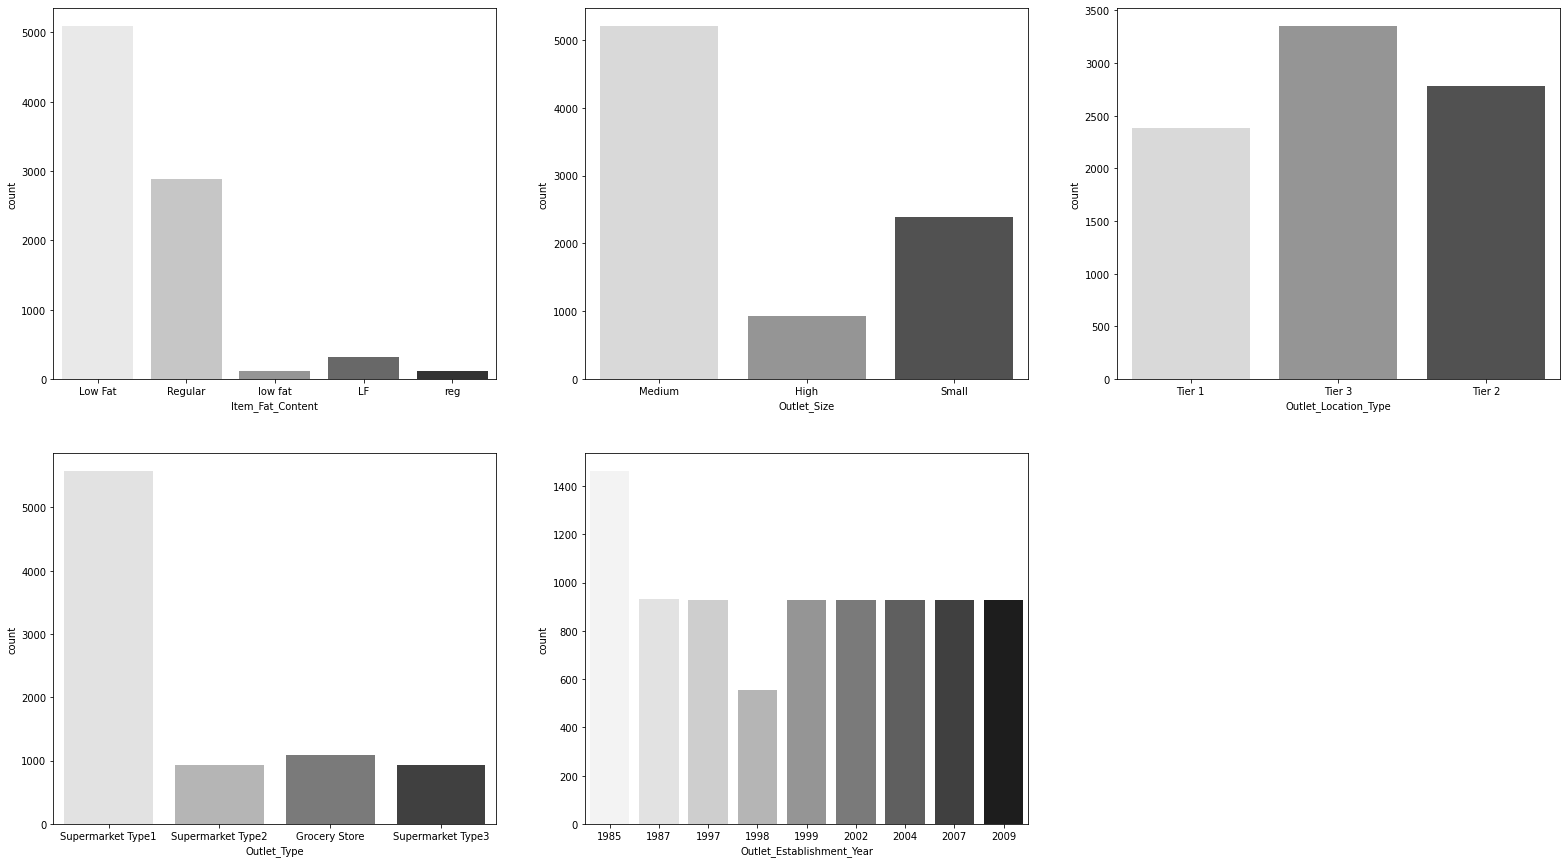

In [8]:
plt.figure(figsize = (27, 15))
plt.subplot(2, 3, 1)
sns.countplot(x = train["Item_Fat_Content"], palette = 'Greys')

# plt.subplot(2, 3, 2)
# sns.countplot(x =train['Item_Type'], palette = 'Greys')

plt.subplot(2, 3, 2)
sns.countplot(x = train['Outlet_Size'], palette = 'Greys')

plt.subplot(2, 3, 3)
sns.countplot(x = train['Outlet_Location_Type'], palette = 'Greys')

plt.subplot(2, 3, 4)
sns.countplot(x = train['Outlet_Type'], palette = 'Greys')

plt.subplot(2, 3, 5)
sns.countplot(x =train['Outlet_Establishment_Year'], palette = 'Greys')


- **Item_Fat_Content** - Maximum products are Low fat products.

- **Outlet_Size** - Medium Size Stores are in greater quantity.

- **Outlet_location-Type** - Tier 3 ranks first followed by Tier 2 and Tier 1.

- **Outlet_Type**- Maximum Outlets Belongs to Supertmarket Type 1.

- **Outlet_Establishment_Year** - Maximum number of stores were established in 1985

<AxesSubplot:>

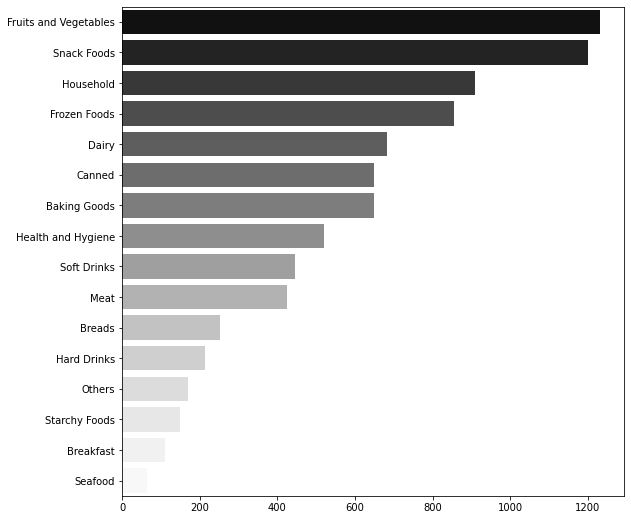

In [9]:
x = train.Item_Type.value_counts()
plt.figure(figsize = (9, 9))
sns.barplot(x= x.values, y = x.index , palette='Greys_r')
# x.index


-  Friuts and Vegetables
-  Snack Foods
-  Household

These are the Top 3 Category where the maximum products belong.

<AxesSubplot:>

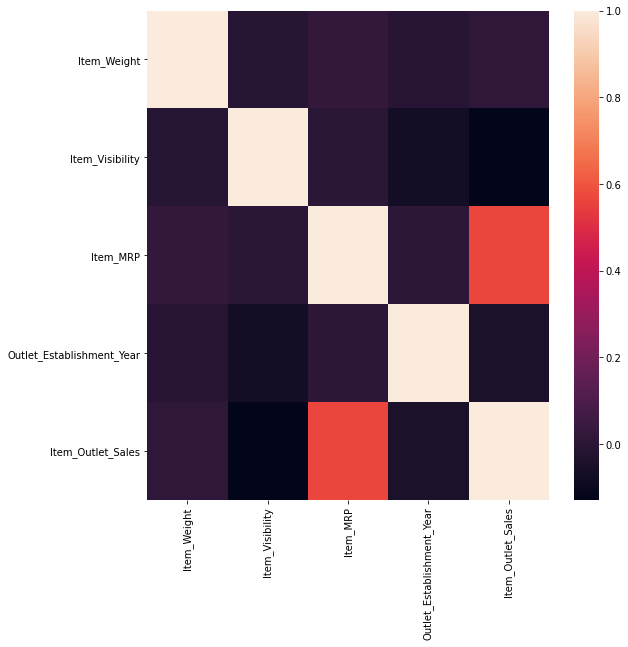

In [10]:
plt.figure(figsize = (9, 9))
sns.heatmap(data = train.corr())

In [11]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


- **Item_Outlet_Sales** is  moderately correlated to **Item_MRP** and optimally with **Item_Weight**

-  where **Item_Visiblity** is Negatively Correlated with all the independent variables.

-  **Item_Outlet_Sales** is negatively correlated with **Item_Visibility** and **Outlet_establishment_year**


In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Preprocessing

In [13]:
df = train.copy()
# df = df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis = 1)
df['Item_Fat_Content'].replace({'LF':0,'low fat': 0, 'reg': 1, 'Low Fat': 0, 'Regular': 1},inplace=True)
df['Outlet_Size'].replace({'High':0,'Medium': 1, 'Small': 2},inplace=True)
df['Outlet_Location_Type'].replace({'Tier 1':0,'Tier 2': 1, 'Tier 3': 2},inplace=True)
df['Outlet_Type'].replace({'Supermarket Type1':0,'Supermarket Type2': 1,'Supermarket Type3':2 ,'Grocery Store': 3},inplace=True)
df['Item_Type'].replace({'Fruits and Vegetables':0,'Snack Foods': 1,'Household':2 ,'Frozen Foods': 3, 'Dairy': 4, 'Canned':5, 'Baking Goods':6,'Health and Hygiene':7, 'Soft Drinks': 8,'Meat': 9, 'Breads': 10, 'Hard Drinks': 11, 'Starchy Foods': 12, 'Breakfast': 13, 'Seafood':14,'Others': 15},inplace=True)

df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

# df =pd.get_dummies(df ,drop_first= True)
df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# train
x = df.drop(['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales'], axis = 1)
y = df['Item_Outlet_Sales']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6404,12.857645,0,0.008722,0,123.5414,1985,1,2,2
5820,18.700000,0,0.014623,8,52.0324,2002,1,1,0
48,15.850000,1,0.121633,6,60.6220,1997,2,0,0
4583,12.857645,0,0.145670,3,247.2776,1985,2,0,3
3791,21.000000,0,0.049296,1,194.4478,2004,2,1,0
...,...,...,...,...,...,...,...,...,...
4373,15.200000,0,0.020280,7,49.1034,1998,1,2,3
7891,12.857645,1,0.025616,1,188.1872,1985,1,2,2
4859,13.500000,1,0.000000,1,78.3960,2004,2,1,0
3264,18.700000,0,0.104890,3,121.4072,2002,1,1,0


In [16]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [17]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [18]:
#model selection 
def model_selection(n):
    model = n
    print("Model name : ", model)
    model.fit(x_train, y_train)

# predict the target on train and test data
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)

    # Root Mean Squared Error on train and test data
    print('RMSE on train data: ', mean_squared_error(y_train, train_predict)**(0.5))
    print('RMSE on test data: ',  mean_squared_error(y_test, test_predict)**(0.5))

- Value of Linear regression is High, Let's see How random forest performs.

In [40]:
model_selection(RandomForestRegressor(random_state=2, max_depth=10))

Model name :  RandomForestRegressor(max_depth=10, random_state=2)
RMSE on train data:  899.6079746641685
RMSE on test data:  1101.6490419875195


- Random Forest has given us optimal rmse

- Fitting RandomForestRegressor

- Predicting on Test Data

- Saving it in a pickle file




In [58]:
#fitting model
model1 =RandomForestRegressor(random_state=2, max_depth=10)
model1.fit(x_train, y_train)

#predicting 
# x_tr_pred = model1.predict(x_train)
pred = model1.predict(x_train)

In [59]:
df2 = pd.DataFrame(columns = ['Actual', 'Predicted'])
df2['Actual'] = y_train
df2['Predicted'] = pred
df2.head(10) #displaying top 10 predictions

,Actual,Predicted
6404,4508.1318,3732.959383
5820,1090.5804,917.108596
48,2576.6460,1294.490701
4583,743.0328,586.581204
3791,968.7390,1775.779354
3635,759.0120,695.323643
321,4950.8888,3832.905734
4724,3044.7034,3020.080984
1819,1012.0160,1845.531419
6306,1017.3424,1927.137757


In [60]:
#using pipeline on test data 
test_data = pd.read_csv('test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [62]:
# x = model_pipeline.predict(test_data)
# # x
df = pd.read_csv('test.csv')
df['Item_Fat_Content'].replace({'LF':0,'low fat': 0, 'reg': 1, 'Low Fat': 0, 'Regular': 1},inplace=True)
df= df.drop(['Item_Identifier', 'Outlet_Identifier'],axis = 1)
df['Outlet_Size'].replace({'High':0,'Medium': 1, 'Small': 2},inplace=True)
df['Outlet_Location_Type'].replace({'Tier 1':0,'Tier 2': 1, 'Tier 3': 2},inplace=True)
df['Outlet_Type'].replace({'Supermarket Type1':0,'Supermarket Type2': 1,'Supermarket Type3':2 ,'Grocery Store': 3},inplace=True)
df['Item_Type'].replace({'Fruits and Vegetables':0,'Snack Foods': 1,'Household':2 ,'Frozen Foods': 3, 'Dairy': 4, 'Canned':5, 'Baking Goods':6,'Health and Hygiene':7, 'Soft Drinks': 8,'Meat': 9, 'Breads': 10, 'Hard Drinks': 11, 'Starchy Foods': 12, 'Breakfast': 13, 'Seafood':14,'Others': 15},inplace=True)

df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

# df =pd.get_dummies(df ,drop_first= True)
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [63]:
model1.predict(df)

array([4893.21105717, 5229.47685108,  630.82115745, ..., 5348.42425051,
       5169.32844082, 5299.34428566])

###### - These are the following predictions we get after using RandomforestRegressor.
- Thank you!

In [64]:
#saving it as a pickle
pickle.dump(model1, open('randomforest.pkl', 'wb'))